# Part (b): Introduction to Data Analytics
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com


The assignment has the below problems:
- Problem 1
- Problem 2
- Problem 3
- Problem 4
- Problem 5
- Problem 6

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


# About The Dataset
The below is a sample dataset on the customer satisfaction based on experience from a purchased product.

- CustomerID - Unique identifier of each customer.
- Age: Customers age.
- Gender of the customer.
- Satisfaction Score: On a scale from 1 to 10.
- Purchase Frequency.
- Feedback by the customer.

*Problem 1*

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. In the customer satisfaction dataset, can you classify the columns with missing data into different categories? (MCAR, MNAR or MAR) (1 point)



In [ ]:
data <- read.csv("/kaggle/input/customer-satisfaction/customer_satisfaction.csv")
head(data)

In [ ]:
missing_data_summary <- sapply(data, function(x) sum(is.na(x)))
print(missing_data_summary)

In [ ]:
classify_missing <- function(column, data) {
  if (sum(is.na(column)) == 0) {
    return("No missing values")
  }
  
  missing_indicator <- is.na(column)
  other_vars <- data[, colnames(data) != colnames(column)]
  other_vars$missing_indicator <- missing_indicator
  
  mean_feedback_missing <- mean(data$Feedback[missing_indicator], na.rm = TRUE)
  mean_feedback_non_missing <- mean(data$Feedback[!missing_indicator], na.rm = TRUE)
  
  if (all(is.na(mean_feedback_missing), is.na(mean_feedback_non_missing))) {
    return("MCAR")
  } else if (mean_feedback_missing != mean_feedback_non_missing) {
    return("MAR")
  } else {
    return("MNAR")
  }
}

column_classifications <- sapply(names(data), function(col) {
  classify_missing(data[[col]], data)
})
print(column_classifications)

**Answer -**

1. CustomerID: No missing values
1. Age: No missing values
1. Gender: No missing values
1. SatisfactionScore: No missing values
1. Purchase Frequency: MCAR
1. Feedback: No missing values

# About the dataset

- The below dataset constitute the results of a chemical analysis on wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
- It has been taken from [here](https://archive.ics.uci.edu/dataset/109/wine).

*Features*
- Alcohol: Percentage of alcohol in the wine (vol. %).
- Malic Acid: Concentration of malic acid (g/dm³).
- Ash: Ash content (g/dm³).
- Alcalinity of Ash: Alcalinity of ash (in terms of NaOH) (g/dm³).
- Magnesium: Magnesium content (mg/dm³).
- Total Phenols: Total phenol content (g/dm³).
- Flavanoids: Flavanoid content (g/dm³).
- Nonflavanoid Phenols: Non-flavanoid phenol content (g/dm³).
- Proanthocyanins: Proanthocyanin content (g/dm³).
- Color Intensity: Color intensity of the wine (arbitrary units).
- Hue: Hue of the wine (arbitrary units).
- OD280/OD315 of Diluted Wines: Ratio of optical densities at 280 nm and 315 nm (arbitrary units).
- Proline: Proline content (mg/dm³).

*`Quality`*:
The target class of the alcohol


*Problem 2*

The mean values of the columns `Flavanoids` and `Total_phenols` in the wine dataset are 2.03 and 2.29, respectively. Although these means are nearby, does this imply that the distributions of these two variables are practically equivalent?

To answer this, create a histogram and overlay the probability density curve for each of the 2 variables. Discuss your findings, particularly focusing on the shape and spread of the distributions. Do add a note on the peaks of the histogram. (2 points)



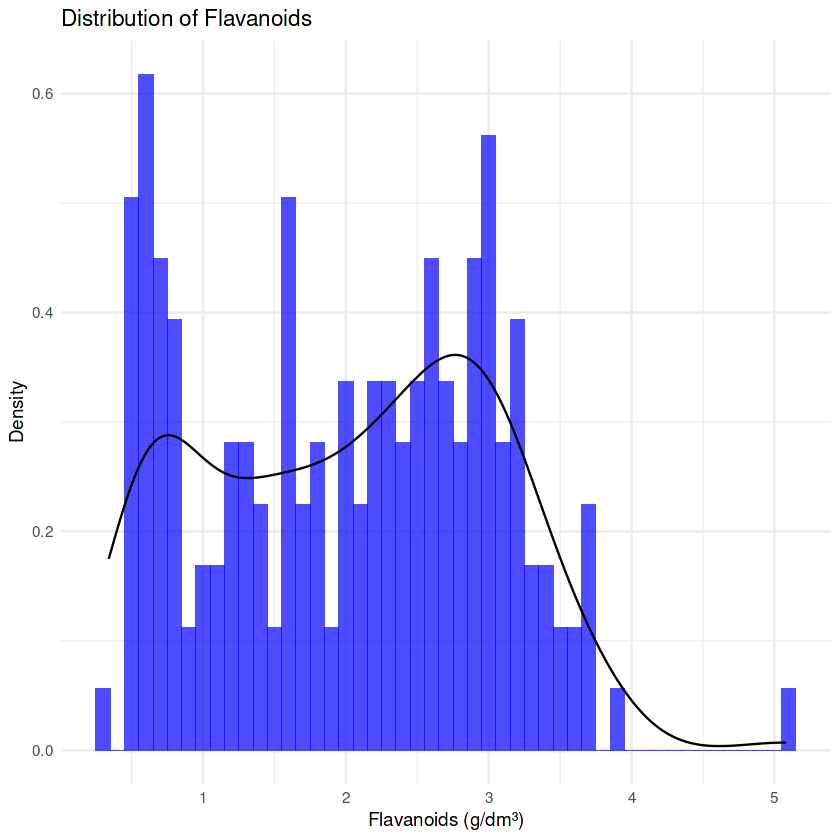

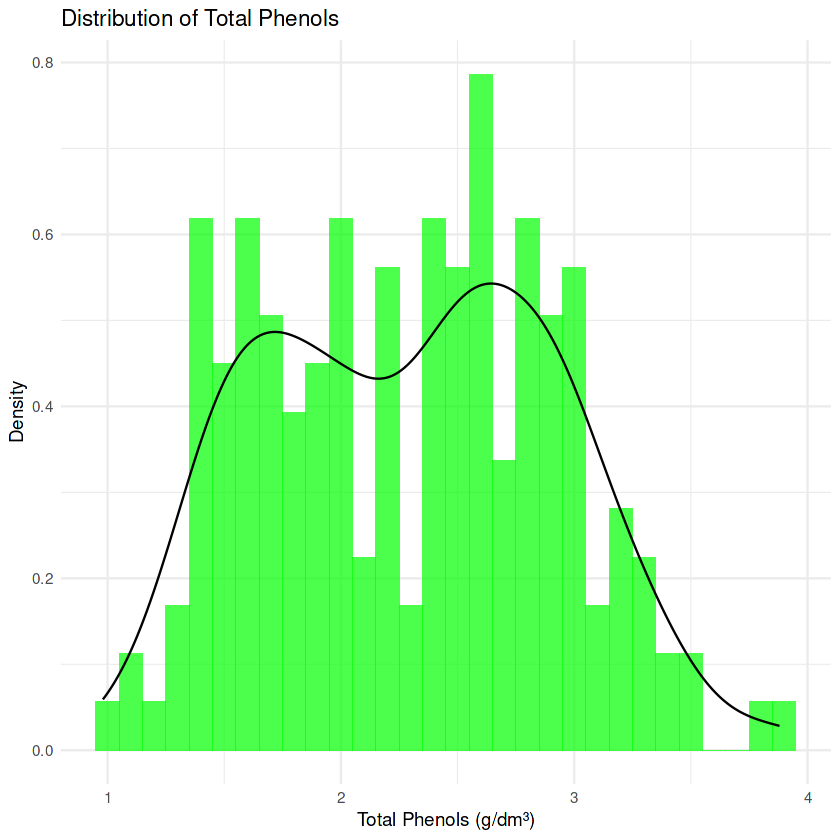

In [51]:
library(ggplot2)

df <- read.csv('/kaggle/input/wine-quality/wine_quality_combined.csv')

par(mfrow = c(1, 2))

ggplot(df, aes(x = Flavanoids)) +
  geom_histogram(aes(y = ..density..), binwidth = 0.1, fill = 'blue', alpha = 0.7) +
  geom_density(colour = 'black') +
  labs(title = 'Distribution of Flavanoids', x = 'Flavanoids (g/dm³)', y = 'Density') +
  theme_minimal()

ggplot(df, aes(x = Total_phenols)) +
  geom_histogram(aes(y = ..density..), binwidth = 0.1, fill = 'green', alpha = 0.7) +
  geom_density(colour = 'black') +
  labs(title = 'Distribution of Total Phenols', x = 'Total Phenols (g/dm³)', y = 'Density') +
  theme_minimal()


**Answer -**

**Analysis of Distributions**
Even though Flavanoids (mean: 2.03) and Total_phenols (mean: 2.29) have similar means, this doesn't imply their distributions are equivalent.

**Distributions:**

Both Flavanoids and Total_phenols are bimodal, indicating multiple peaks.
Flavanoids is positively skewed, meaning it has a longer tail on the right side.

*Problem 3*

For the different types of quality of alcohol, compare the distributions of its color intensity. Add a note on the outliers and skewness of each category. You can make use of the box plot. (1 + 1 points)



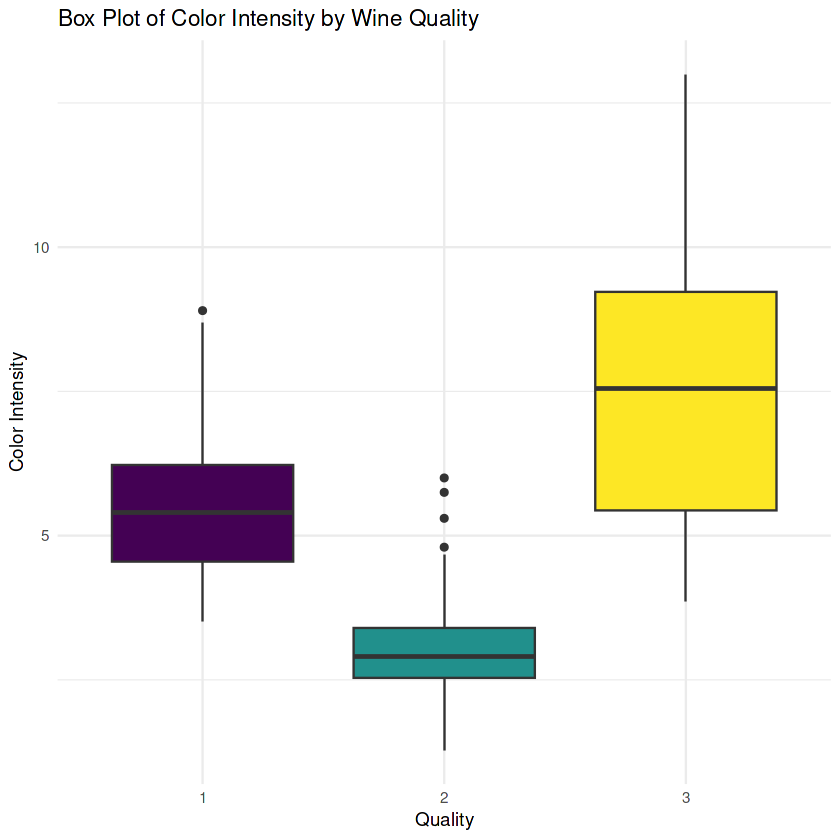

In [61]:
library(ggplot2)

ggplot(data, aes(x = as.factor(quality), y = Color_intensity, fill = as.factor(quality))) +
  geom_boxplot() +
  labs(x = 'Quality', y = 'Color Intensity', title = 'Box Plot of Color Intensity by Wine Quality') +
  theme_minimal() +
  scale_fill_viridis_d() +
  theme(legend.position = "none")

**Answer -**
* Quality 1: Slight positive skew with a few outliers.
* Quality 2: More pronounced positive skew and a higher number of outliers.
* Quality 3: Nearly symmetric distribution with no outliers.

*Problem 4*

Explain Dimensionality Reduction. Perform PCA on the dataset and extract the proportion of variance explained by each principal component. How many principal components should be retained based on the `scree plot`? Examine the loadings of the first two principal components. Which variables contribute most to these components? (2 points)

**Hint**:
Scree Plot is a common method for determining the number of PCs to be retained through a graphical representation. A Scree Plot is a simple line segment plot that shows the eigenvalues for each individual PC. 

You can learn more about a scree plot [here](https://sanchitamangale12.medium.com/scree-plot-733ed72c8608)

**Hint**:
In PCA, the contribution of each feature to a principal component is called the `loading`. Loadings are compared with the absolute value



   PC VarianceExplained
1   1       0.393901125
2   2       0.178577618
3   3       0.103563093
4   4       0.066288259
5   5       0.062612221
6   6       0.048047605
7   7       0.039613764
8   8       0.024959798
9   9       0.021340814
10 10       0.019082196
11 11       0.016169373
12 12       0.012341067
13 13       0.009358045
14 14       0.004145021
                           PC1         PC2
Alcohol           -0.136759348 -0.48381599
Malicacid          0.223517788 -0.22306342
Ash               -0.002167986 -0.31455873
Alcalinity_of_ash  0.223881258  0.01392023
Magnesium         -0.125282960 -0.29993121
Total_phenols     -0.360147794 -0.06678753
                                                   Variable  PC1_Loading
Alcohol                                             Alcohol -0.136759348
Malicacid                                         Malicacid  0.223517788
Ash                                                     Ash -0.002167986
Alcalinity_of_ash                         Alcal

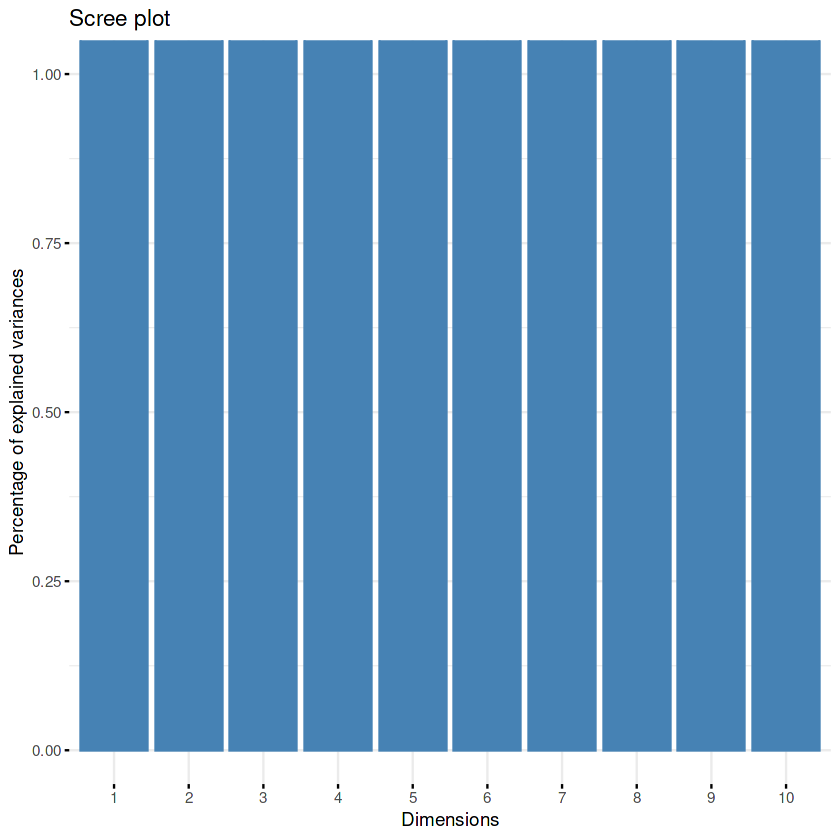

In [64]:
library(ggplot2)
library(FactoMineR)
library(factoextra)

data_numeric <- data[, sapply(data, is.numeric)]

data_scaled <- scale(data_numeric)

pca_result <- prcomp(data_scaled, center = TRUE, scale. = TRUE)

variance_explained <- pca_result$sdev^2 / sum(pca_result$sdev^2)
variance_explained_df <- data.frame(PC = 1:length(variance_explained), VarianceExplained = variance_explained)

print(variance_explained_df)

scree_plot <- fviz_eig(pca_result, addlabels = TRUE, ylim = c(0, 1))
print(scree_plot)

loadings <- pca_result$rotation
print(head(loadings[, 1:2]))

loadings_df <- data.frame(Variable = rownames(loadings), PC1_Loading = loadings[, 1], PC2_Loading = loadings[, 2])
print(loadings_df)

**Answer -**

**1. Dimensionality Reduction**

Dimensionality reduction is a process used to reduce the number of features or variables in a dataset while retaining as much information as possible. This is particularly useful in high-dimensional data to simplify models, reduce computational costs, and mitigate the risk of overfitting. 

**2. Cumulative Proportion**

The first two principal components (PC1 and PC2) together explain approximately 56.25% of the total variance in the dataset.

**3. Principal Components to Retain**

The scree plot indicates that the first few principal components (usually up to PC3 or PC4) capture the majority of the variance. Thus, it is reasonable to retain these components for further analysis.

**4. Loadings of the First Two Principal Components:**

*PC1:*

High negative loadings: Total_phenols (-0.3601), Flavanoids (-0.3914), X0D280_0D315_of_diluted_wines (-0.3460)
High positive loadings: Malicacid (0.2235), Alcalinity_of_ash (0.2239), Nonflavanoid_phenols (0.2675)

*PC2:*

High negative loadings: Color_intensity (-0.5296), Alcohol (-0.4838), Magnesium (-0.2999)
High positive loadings: Hue (0.2777), X0D280_0D315_of_diluted_wines (0.1675)

**5. Variables contributing :**

PC1 is significantly influenced by Total_phenols, Flavanoids, and X0D280_0D315_of_diluted_wines.

PC2 is heavily influenced by Color_intensity and Alcohol.

These variables contribute most to the variance captured by each principal component and are crucial for interpreting the underlying structure of the data.

*Problem 5* 

Now, for the selected components, find the percentage contribution of each feature to each of the components. (Hint: First find the square of the loadings also known as the cos2 values - find percentage contribution using these values) (2 points)

In [67]:
library(tidyverse)
library(FactoMineR)

loadings <- data.frame(
  Variable = c("Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", 
                "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", 
                "Proanthocyanins", "Color_intensity", "Hue", 
                "X0D280_0D315_of_diluted_wines", "Proline", "quality"),
  PC1_Loading = c(-0.136759348, 0.223517788, -0.002167986, 0.223881258, 
                  -0.125282960, -0.360147794, -0.391426968, 0.267513383, 
                  -0.279504603, 0.089582399, -0.277710267, -0.346045694, 
                  -0.269578915, 0.394128393),
  PC2_Loading = c(-0.483815991, -0.223063419, -0.314558733, 0.013920235, 
                  -0.299931209, -0.066787531, 0.001303494, -0.026576569, 
                  -0.041300575, -0.529623586, 0.277664358, 0.167458052, 
                  -0.366774292, -0.005153095)
)

loadings$PC1_cos2 <- loadings$PC1_Loading^2
loadings$PC2_cos2 <- loadings$PC2_Loading^2

total_PC1_cos2 <- sum(loadings$PC1_cos2)
loadings$PC1_Percentage <- (loadings$PC1_cos2 / total_PC1_cos2) * 100

total_PC2_cos2 <- sum(loadings$PC2_cos2)
loadings$PC2_Percentage <- (loadings$PC2_cos2 / total_PC2_cos2) * 100

print(loadings)


                        Variable  PC1_Loading  PC2_Loading     PC1_cos2
1                        Alcohol -0.136759348 -0.483815991 1.870312e-02
2                      Malicacid  0.223517788 -0.223063419 4.996020e-02
3                            Ash -0.002167986 -0.314558733 4.700163e-06
4              Alcalinity_of_ash  0.223881258  0.013920235 5.012282e-02
5                      Magnesium -0.125282960 -0.299931209 1.569582e-02
6                  Total_phenols -0.360147794 -0.066787531 1.297064e-01
7                     Flavanoids -0.391426968  0.001303494 1.532151e-01
8           Nonflavanoid_phenols  0.267513383 -0.026576569 7.156341e-02
9                Proanthocyanins -0.279504603 -0.041300575 7.812282e-02
10               Color_intensity  0.089582399 -0.529623586 8.025006e-03
11                           Hue -0.277710267  0.277664358 7.712299e-02
12 X0D280_0D315_of_diluted_wines -0.346045694  0.167458052 1.197476e-01
13                       Proline -0.269578915 -0.366774292 7.267

*Problem 6*

Generate a plot using the `fviz_pca_var` function to visualize how well each feature is represented by the principal components in the PCA analysis. (Pay attention to the length of the arrows in the fviz_pca_var plot.) (1 point)

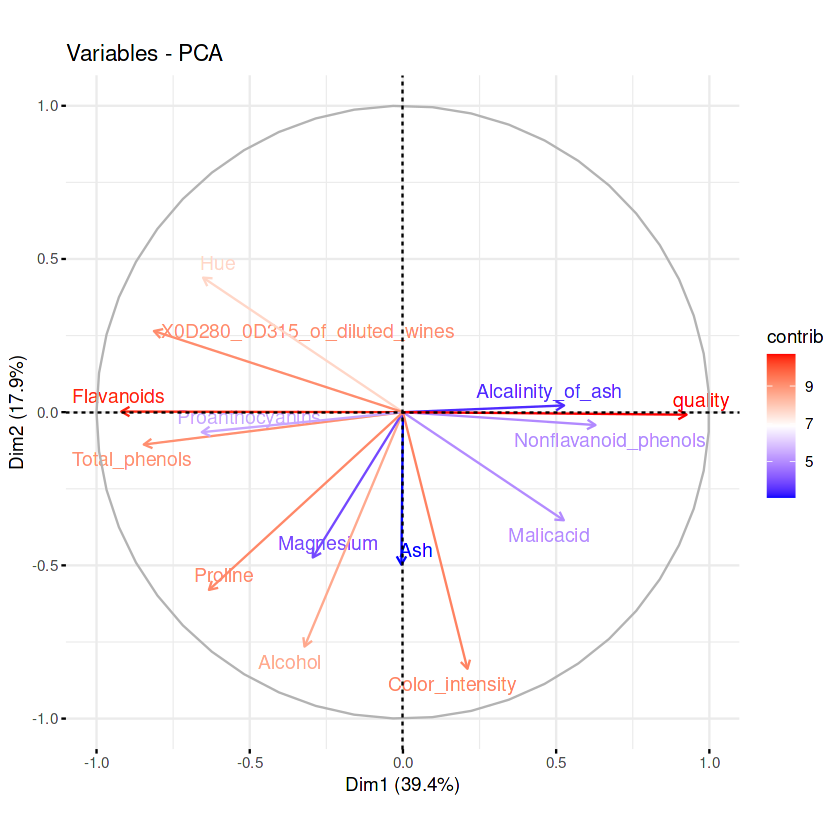

In [68]:
library(factoextra)
library(FactoMineR)

fviz_pca_var(pca_result, 
             col.var = "contrib",  
             gradient.cols = c("blue", "white", "red"),
             repel = TRUE,         
             labelsize = 4)        

PCA is performed at times when the dataset is large. The reduced set takes considerably smaller space and shorter time to train classifiers/ regression models with only making use of the most influential data.